In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>
This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [3]:
#To download the data, we will use !wget to download it from IBM Object Storage.
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-04-05 14:34:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

100%[======================================>] 36,144      --.-K/s   in 0.07s   

2020-04-05 14:34:48 (473 KB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [5]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
#feature selection
df= df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
df['churn']= df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [8]:
df.shape

(200, 10)

In [13]:
X = np.asarray(df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']])
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.,   1.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.,   0.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.,   0.]])

In [14]:
y= np.asarray(df['churn'])
y[:5]

array([1, 1, 0, 0, 0])

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148,  1.56469673],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673, -0.63910148],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148, -0.63910148]])

## Train/Test dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state=4)
print("Train set:",X_train.shape,y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

Train set: (140, 10) (140,)
Test set: (60, 10) (60,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.01, solver= 'sag').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
yhat= LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.79, 0.21],
       [0.79, 0.21],
       [0.55, 0.45],
       [0.84, 0.16],
       [0.55, 0.45],
       [0.61, 0.39],
       [0.51, 0.49],
       [0.79, 0.21],
       [0.43, 0.57],
       [0.61, 0.39],
       [0.78, 0.22],
       [0.8 , 0.2 ],
       [0.76, 0.24],
       [0.44, 0.56],
       [0.85, 0.15],
       [0.76, 0.24],
       [0.51, 0.49],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.58, 0.42],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.84, 0.16],
       [0.75, 0.25],
       [0.73, 0.27],
       [0.87, 0.13],
       [0.72, 0.28],
       [0.74, 0.26],
       [0.73, 0.27],
       [0.87, 0.13],
       [0.86, 0.14],
       [0.77, 0.23],
       [0.44, 0.56],
       [0.88, 0.12],
       [0.63, 0.37],
       [0.81, 0.19],
       [0.48, 0.52],
       [0.58, 0.42],
       [0.85, 0.15],
       [0.74, 0.26],
       [0.85, 0.15],
       [0.5 , 0.5 ],
       [0.81, 0.19],
       [0.81, 0.19],
       [0.85, 0.15],
       [0.77, 0.23],
       [0.89, 0.11],
       [0.86,

## Accuracy Evaluation

In [34]:
#jaccard index
from sklearn.metrics import jaccard_similarity_score

In [35]:
jaccard_similarity_score(y_test,yhat)

0.8166666666666667

In [36]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6 11]
 [ 0 43]]


Confusion matrix, without normalization
[[ 6 11]
 [ 0 43]]


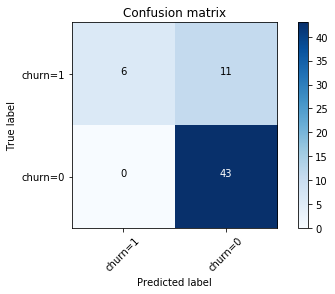

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [38]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        43
           1       1.00      0.35      0.52        17

   micro avg       0.82      0.82      0.82        60
   macro avg       0.90      0.68      0.70        60
weighted avg       0.85      0.82      0.78        60



In [39]:
#log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.37703066896880283